In [ ]:
import torch
torch.__version__

'2.9.0+cu126'

In [1]:
import torchsummary


In [ ]:
!wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip

--2025-11-20 06:29:25--  https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/405934815/e712cf72-f851-44e0-9c05-e711624af985?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-20T07%3A24%3A19Z&rscd=attachment%3B+filename%3Ddata.zip&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-20T06%3A23%3A28Z&ske=2025-11-20T07%3A24%3A19Z&sks=b&skv=2018-11-09&sig=SzOiL3nY6afeFskKFOt6XTxiFGSvODnv1zwSfcSW6J0%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MzYyMTk2NSwibmJmIjoxNzYzNjIwMTY1LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG

In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/test/
   creating: data/test/curly/
  inflating: data/test/curly/03312ac556a7d003f7570657f80392c34.jpg  
  inflating: data/test/curly/106dfcf4abe76990b585b2fc2e3c9f884.jpg  
  inflating: data/test/curly/1a9dbe23a0d95f1c292625960e4509184.jpg  
  inflating: data/test/curly/341ea26e6677b655f8447af56073204a4.jpg  
  inflating: data/test/curly/61aPFVrm42L._SL1352_.jpg  
  inflating: data/test/curly/6d8acb0fe980774ea4e5631198587f45.png  
  inflating: data/test/curly/7f5649a0c33a2b334f23221a52c16b9b.jpg  
  inflating: data/test/curly/90146673.jpg  
  inflating: data/test/curly/9b3608e01d78fbabc9fb0719323d507f4.jpg  
  inflating: data/test/curly/b171c99161f3cffc12d4b74488ef2fc6.jpg  
  inflating: data/test/curly/blogger_one.jpg  
  inflating: data/test/curly/c03ca1590aa4df74e922ad8257305a2b.jpg  
  inflating: data/test/curly/c1b89bb4f86a3478ec20ce1f63f003c1.jpg  
  inflating: data/test/curly/c5.jpg  
  inflating: data/test/curly/C86_76156

In [2]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data.dataloader import DataLoader
from torchvision import datasets, transforms, models
import torchvision
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
TRAIN_FOLDER = './data/train'
TEST_FOLDER = './data/test'
SEED = 42
BATCH_SIZE = 20
IMAGE_SIZE = 200
EPOCHS = 10

In [ ]:
np.random.seed(SEED)
torch.manual_seed(SEED)

if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False



In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    #transforms.RandomHorizontalFlip(),
    #transforms.RandomRotation(10),
    #transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

test_val_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [ ]:
train_dataset = datasets.ImageFolder(TRAIN_FOLDER, transform=train_transform)
#val_dataset   = datasets.ImageFolder(cfg.val_dir,   transform=test_val_transform)
test_dataset  = datasets.ImageFolder(TEST_FOLDER,  transform=test_val_transform)

num_classes = len(train_dataset.classes)
print("Classes:", train_dataset.classes)


Classes: ['curly', 'straight']


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE,
                          shuffle=True)

#val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE,
#                        shuffle=False, num_workers=cfg.num_workers)

test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                         shuffle=False)


In [ ]:
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")
print(f"Number of classes: {num_classes}")
print(f"Classes: {train_dataset.classes}")

Number of training samples: 800
Number of test samples: 201
Number of classes: 2
Classes: ['curly', 'straight']


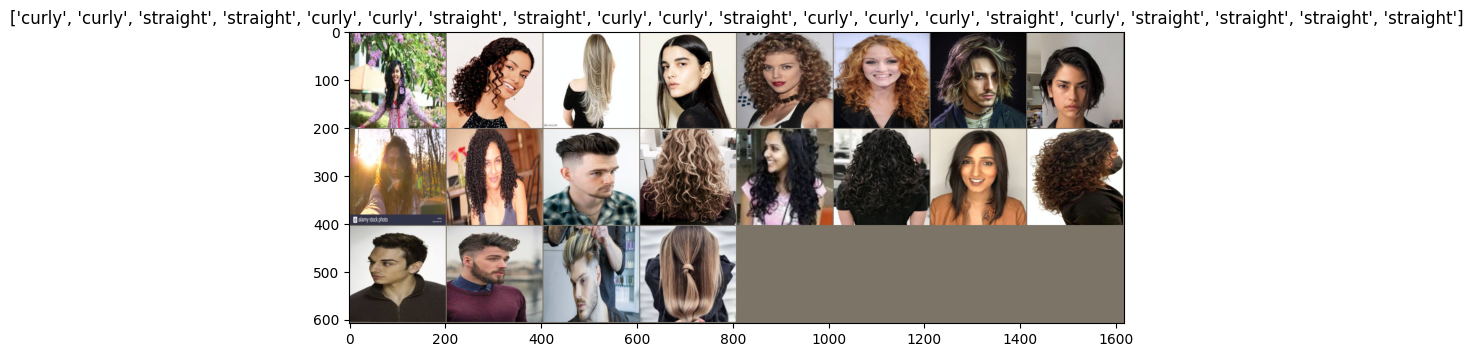

In [ ]:

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

plt.figure(figsize=(10, 10))
imshow(out, title=[train_dataset.classes[x] for x in classes])


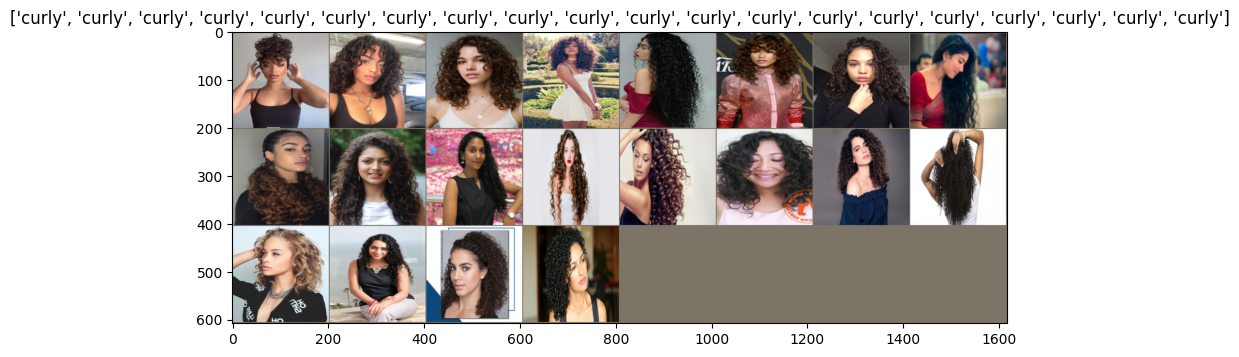

In [ ]:
# Get a batch of training data
inputs, classes = next(iter(test_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

plt.figure(figsize=(10, 10))
imshow(out, title=[test_dataset.classes[x] for x in classes])

In [4]:
# create model
class HairModel(nn.Module):
    def __init__(self):
        super(HairModel, self).__init__()

        # Hout​=(H+2P−K​)/S+1
        self.base_model = nn.Sequential(
            # (200 + 2*0 - 3)/1 + 1 = 198
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # (32, 99, 99)
        )
        self.flatten = nn.Flatten() # (32, 99*99,) = 313632
        self.fc = nn.Sequential(
            nn.Linear(32 * 99 * 99, 64), # (64,)
            nn.ReLU(),
            nn.Linear(64, 1), # (1,)
        )


    def forward(self, x):
        x = self.base_model(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

Question 2
What's the total number of parameters of the model

In [8]:
torchsummary.summary(HairModel().to("cuda"), (3, 200, 200))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 198, 198]             896
              ReLU-2         [-1, 32, 198, 198]               0
         MaxPool2d-3           [-1, 32, 99, 99]               0
           Flatten-4               [-1, 313632]               0
            Linear-5                   [-1, 64]      20,072,512
              ReLU-6                   [-1, 64]               0
            Linear-7                    [-1, 1]              65
Total params: 20,073,473
Trainable params: 20,073,473
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.46
Forward/backward pass size (MB): 23.93
Params size (MB): 76.57
Estimated Total Size (MB): 100.96
----------------------------------------------------------------


32x99x99 - 313632


In [ ]:
def train_one_epoch(model, loader, criterion, optimizer):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)
        labels = labels.float()
        if labels.ndim == 1:
            labels = labels.unsqueeze(1)  # Ensure shape [batch, 1]

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        preds = torch.sigmoid(outputs) > 0.5
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(loader), accuracy


In [ ]:
def validate(model, loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            labels = labels.float()
            if labels.ndim == 1:
                labels = labels.unsqueeze(1)  # Ensure shape [batch, 1]

            outputs = model(imgs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()

            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(loader), accuracy


Question 1. Loss

In [ ]:

model = HairModel()
model = model.to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.002, momentum=0.8)

Question 2. Number of parameters

In [ ]:

arr_train_acc = []
arr_train_loss = []

arr_test_acc = []
arr_test_loss = []

idx = 0
for epoch in range(EPOCHS):

    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer)
    test_loss, test_acc = validate(model, test_loader, criterion)

    arr_train_acc.append(train_acc)
    arr_train_loss.append(train_loss)
    arr_test_acc.append(test_acc)
    arr_test_loss.append(test_loss)

    print(idx)
    print(f"Epoch {epoch+1}/{EPOCHS}")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"  Val Loss  : {test_loss:.4f} | Val Acc: {test_acc:.4f}")

    idx += 1
    # Save best model
    #if test_loss < best_val_loss:
    #    best_val_loss = test_loss
    #    os.makedirs(os.path.dirname(cfg.model_save_path), exist_ok=True)
    #    torch.save(model.state_dict(), cfg.model_save_path)
    #    print("  → Best model saved!")


0
Epoch 1/10
  Train Loss: 0.6196 | Train Acc: 0.6475
  Val Loss  : 0.6438 | Val Acc: 0.6318
1
Epoch 2/10
  Train Loss: 0.5825 | Train Acc: 0.6950
  Val Loss  : 0.6286 | Val Acc: 0.6318
2
Epoch 3/10
  Train Loss: 0.5154 | Train Acc: 0.7125
  Val Loss  : 0.6268 | Val Acc: 0.6667
3
Epoch 4/10
  Train Loss: 0.4869 | Train Acc: 0.7525
  Val Loss  : 0.5652 | Val Acc: 0.6716
4
Epoch 5/10
  Train Loss: 0.3978 | Train Acc: 0.8037
  Val Loss  : 0.6374 | Val Acc: 0.7065
5
Epoch 6/10
  Train Loss: 0.3329 | Train Acc: 0.8588
  Val Loss  : 0.8430 | Val Acc: 0.6269
6
Epoch 7/10
  Train Loss: 0.2751 | Train Acc: 0.8975
  Val Loss  : 0.6270 | Val Acc: 0.6915
7
Epoch 8/10
  Train Loss: 0.2012 | Train Acc: 0.9213
  Val Loss  : 0.6779 | Val Acc: 0.7313
8
Epoch 9/10
  Train Loss: 0.1428 | Train Acc: 0.9525
  Val Loss  : 0.7133 | Val Acc: 0.7363
9
Epoch 10/10
  Train Loss: 0.1567 | Train Acc: 0.9450
  Val Loss  : 0.7359 | Val Acc: 0.7264


Question 3. Median of training accuracy for all the epochs

In [ ]:
print(np.median(arr_train_acc))
print(np.median(arr_test_acc))

0.83125
0.681592039800995


Question 4. Standard deviation of training loss for all the epochs

In [ ]:
print(np.std(arr_train_loss))
print(np.std(arr_test_loss))

0.1670620072147969
0.07373932192073787


In [ ]:
train_transform_aug = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomRotation(50),
    transforms.RandomResizedCrop(200, scale=(0.9, 1.0), ratio=(0.9, 1.1)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


train_dataset_aug = datasets.ImageFolder(TRAIN_FOLDER, transform=train_transform_aug)


train_loader_aug = DataLoader(train_dataset_aug, batch_size=BATCH_SIZE,
                          shuffle=True)

In [ ]:

arr_train_acc_aug = []
arr_train_loss_aug = []

arr_test_acc_aug     = []
arr_test_loss_aug = []

idx = 0
for epoch in range(EPOCHS):

    train_loss_aug, train_acc_aug = train_one_epoch(model, train_loader_aug, criterion, optimizer)
    test_loss_aug, test_acc_aug = validate(model, test_loader, criterion)

    arr_train_acc_aug.append(train_acc_aug)
    arr_train_loss_aug.append(train_loss_aug)
    arr_test_acc_aug.append(test_acc_aug)
    arr_test_loss_aug.append(test_loss_aug)

    print(idx)
    print(f"Epoch {epoch+1}/{EPOCHS}")
    print(f"  Train Loss: {train_loss_aug:.4f} | Train Acc: {train_acc_aug:.4f}")
    print(f"  Val Loss  : {test_loss_aug:.4f} | Val Acc: {test_acc_aug:.4f}")

    idx += 1
    # Save best model
    #if test_loss < best_val_loss:
    #    best_val_loss = test_loss
    #    os.makedirs(os.path.dirname(cfg.model_save_path), exist_ok=True)
    #    torch.save(model.state_dict(), cfg.model_save_path)
    #    print("  → Best model saved!")


0
Epoch 1/10
  Train Loss: 0.6723 | Train Acc: 0.6700
  Val Loss  : 0.6153 | Val Acc: 0.7164
1
Epoch 2/10
  Train Loss: 0.6013 | Train Acc: 0.6663
  Val Loss  : 0.5960 | Val Acc: 0.7065
2
Epoch 3/10
  Train Loss: 0.5880 | Train Acc: 0.6600
  Val Loss  : 0.5885 | Val Acc: 0.7114
3
Epoch 4/10
  Train Loss: 0.5580 | Train Acc: 0.7063
  Val Loss  : 0.6060 | Val Acc: 0.6716
4
Epoch 5/10
  Train Loss: 0.5355 | Train Acc: 0.7200
  Val Loss  : 0.7990 | Val Acc: 0.6866
5
Epoch 6/10
  Train Loss: 0.5289 | Train Acc: 0.7113
  Val Loss  : 0.6947 | Val Acc: 0.6269
6
Epoch 7/10
  Train Loss: 0.5237 | Train Acc: 0.7188
  Val Loss  : 0.4876 | Val Acc: 0.7264
7
Epoch 8/10
  Train Loss: 0.5080 | Train Acc: 0.7325
  Val Loss  : 0.6113 | Val Acc: 0.6915
8
Epoch 9/10
  Train Loss: 0.5061 | Train Acc: 0.7575
  Val Loss  : 0.6843 | Val Acc: 0.6816
9
Epoch 10/10
  Train Loss: 0.4912 | Train Acc: 0.7588
  Val Loss  : 0.5853 | Val Acc: 0.7264


Question 5. Mean of test loss for all the epochs

In [ ]:
print(np.median(arr_train_acc_aug))
print(np.median(arr_test_acc_aug))

print('')

print(np.mean(arr_train_loss_aug))
print(np.mean(arr_test_loss_aug))

0.7150000000000001
0.6990049751243781

0.5513114748895168
0.6267891535704786


In [ ]:
print(np.std(arr_train_loss_aug))
print(np.std(arr_test_loss_aug))

0.052500966935382885
0.07867021930345948


Question 6. Average of test accuracy for the last 5 epochs

In [ ]:
np.mean(arr_test_acc_aug[5:])

np.float64(0.690547263681592)